In [74]:
import numpy as np
import pandas as pd
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from tqdm import *
from math import *
import operator
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
pd.__version__
import seaborn as sns

In [75]:
df=pd.read_csv("/Users/amitpatel/Downloads/delivery-driver.tsv",sep='\t', header=0)

In [76]:
df

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
...,...,...,...
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0


In [77]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [78]:
df.tail()

,Driver_ID,Distance_Feature,Speeding_Feature
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0
3999,3423311533,168.03,9.0


In [79]:
df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


# Data Cleaning

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 93.9 KB


In [81]:
df.columns

Index(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'], dtype='object')

<AxesSubplot:>

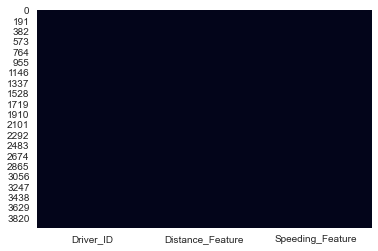

In [82]:
sns.heatmap(df.isnull(), cbar=False)

# Basic Visulaisation of Delivery Driver

In [83]:
import seaborn as sns

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speeding_Feature', ylabel='count'>

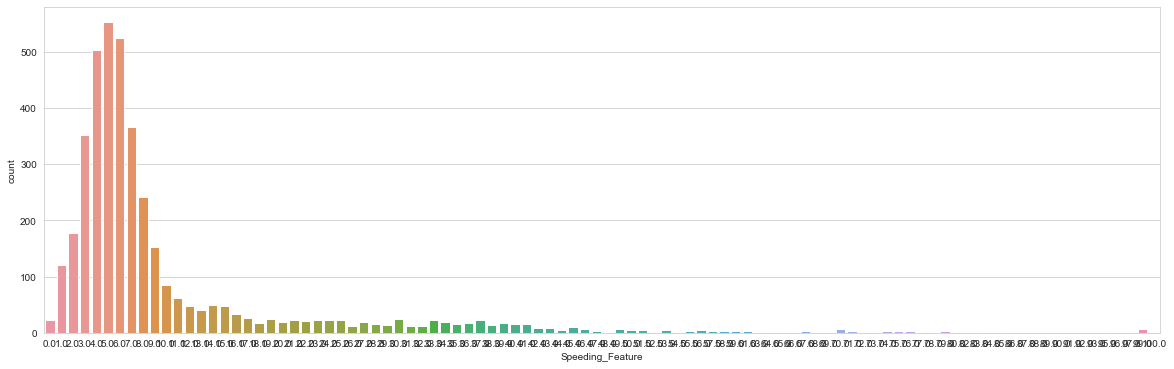

In [84]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot('Speeding_Feature', data=df)

Most of the delivery guy around 300-500 are having speeding feature near 10.

<AxesSubplot:>

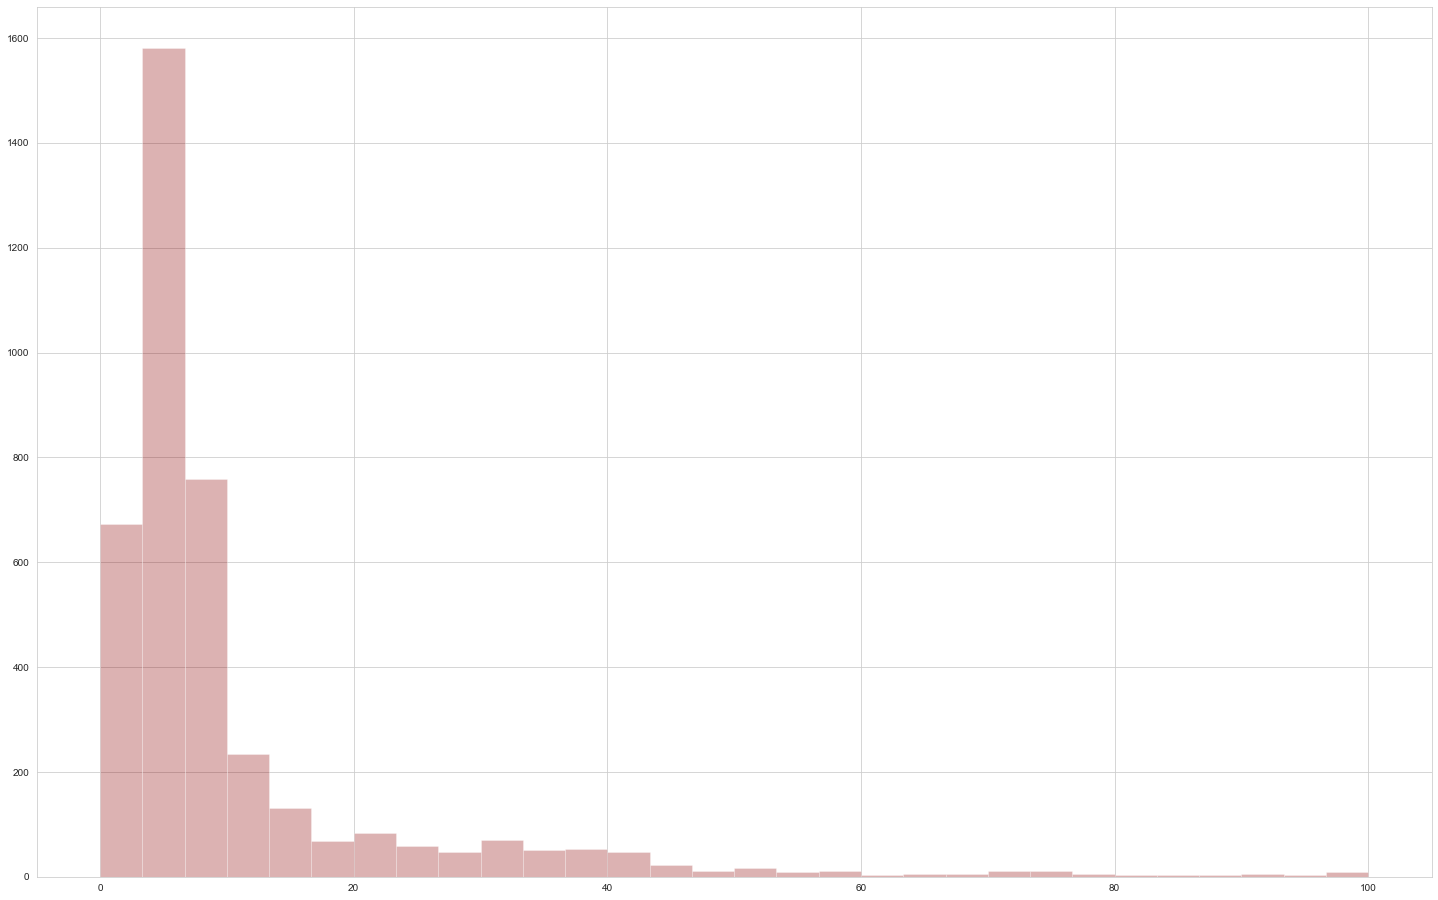

In [85]:
plt.figure(figsize=(25,16))
df['Speeding_Feature'].hist(bins=30,color='darkred',alpha=0.3)

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance_Feature', ylabel='count'>

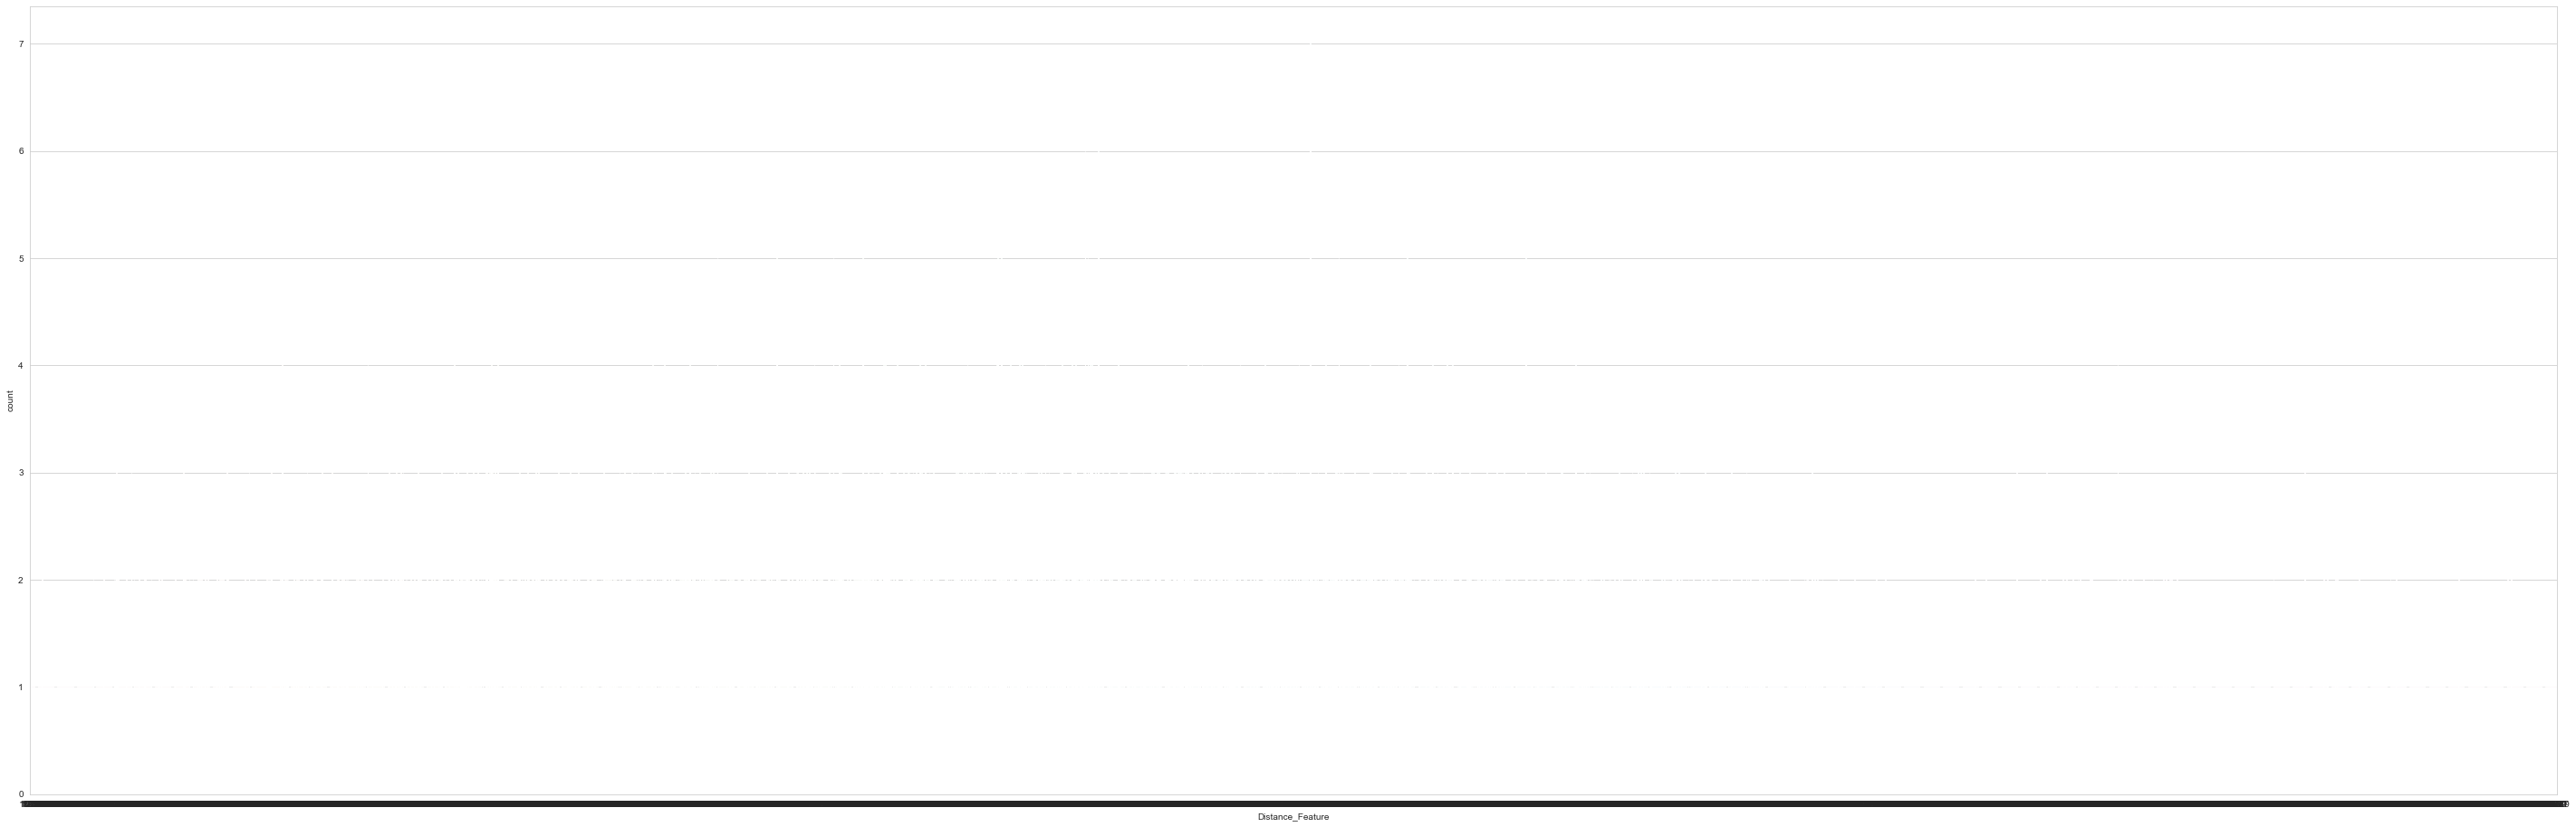

In [86]:
plt.figure(figsize=(50,16))
sns.set_style('whitegrid')
sns.countplot('Distance_Feature', data=df)

Most of the driver's speeding feature is around 10! 

<AxesSubplot:>

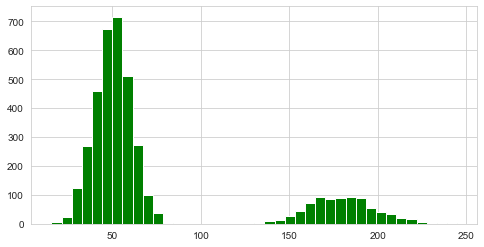

In [87]:
df['Distance_Feature'].hist(color='green',bins=40,figsize=(8,4))

Let's Check if there is any correlation between Distance Feature,Speeding_Feature.

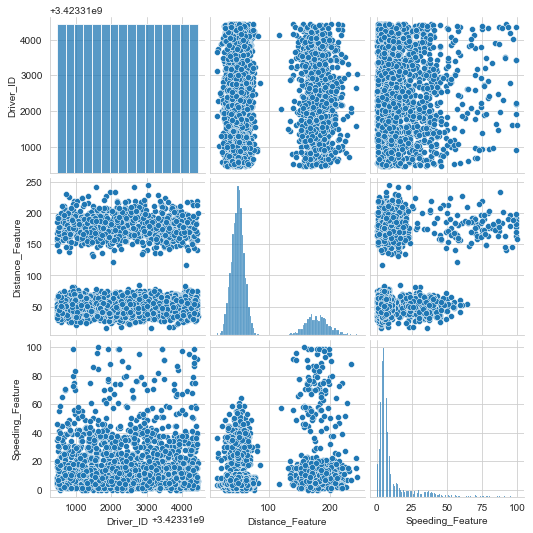

In [88]:
sns.pairplot(df)

There are around 70% of drivers who's speeding feature is below 50.
Mostly driver travels for around 0-60 km or b/w 150-200 km.

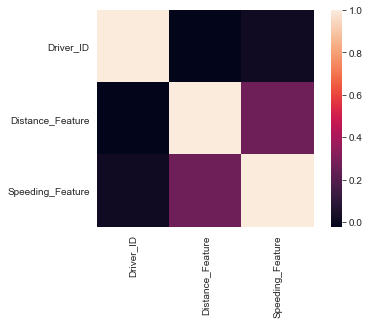

In [89]:
corrmat=df.corr()
sns.heatmap(corrmat,vmax=1,square=True)
plt.show()

# Clusters

Using Scatter plot of seaborn module for cluster

<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

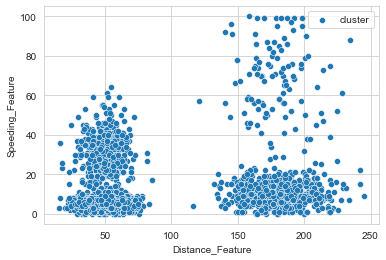

In [90]:
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature',data=df,label="cluster")

So, by the visualization there are 4 clusters.

 We can also use joint plot to identify clusters!

/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


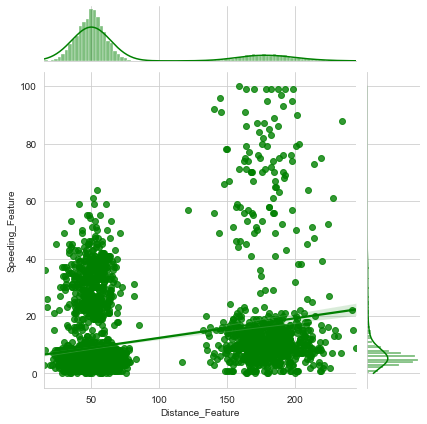

In [91]:
sns.jointplot(df['Distance_Feature'],df['Speeding_Feature'],kind='reg',color='green')

Now we will find out actual numbers of clusters by using Dendogram

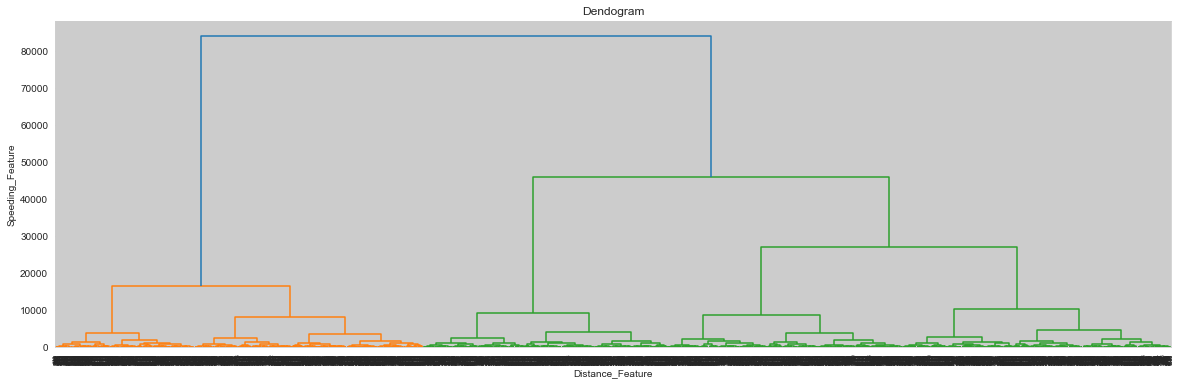

In [92]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,6))
dendogram = sch.dendrogram(sch.linkage(df , method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [93]:
from sklearn.cluster import KMeans

Creating K-means object

In [96]:
df['Distance_Feature']

0        71.24
1        52.53
2        64.54
3        55.69
4        54.58
         ...  
3995    160.04
3996    176.17
3997    170.91
3998    176.14
3999    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

In [102]:
df.drop(columns='Driver_ID', inplace=True)

In [118]:
y=df['Distance_Feature']

In [119]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(y)

In [120]:
y

array([2102, 1264, 1940, ..., 2418, 2483, 2367])

In [103]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [104]:
kmodel=kmeans.fit(df)

In [105]:
L=kmodel.labels_

In [109]:
L

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [123]:
L.shape

(4000,)

In [124]:
y.shape

(4000,)

In [111]:
set(L)

{0, 1, 2, 3}

In [112]:
clusters=kmeans.cluster_centers_

In [113]:
print(clusters)

[[ 49.99439856   5.26391382]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40489157  32.75180723]]


In [115]:
df['clusters']=L

<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

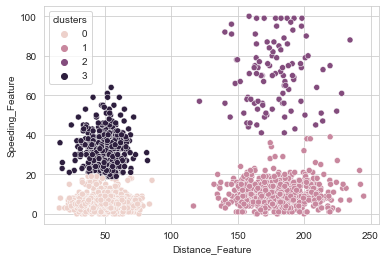

In [116]:
sns.scatterplot(data=df, x='Distance_Feature', y='Speeding_Feature', hue="clusters") 